# Superhero Image Classification

Image classification is a subfield of computer vision that involves the categorization of images into specific classes or categories. It is an important task in machine learning and has numerous applications in various fields.

The ability to automatically classify images can be used in many ways, such as improving the performance of image search engines, detecting and identifying objects in real-time, and assisting medical diagnosis. In addition, image classification can also be applied in security systems to detect and recognize individuals and objects in surveillance footage.

One of the most popular tools for image classification is TensorFlow, a powerful open-source machine learning library developed by Google. With TensorFlow, developers can easily create deep learning models that can accurately classify images and make predictions based on them.

This python script using TensorFlow allows to classify images of deadpool or hulk. Such classification models can be trained on other types of images as well, such as cars, animals, and natural scenes. The applications of image classification are endless.

## Installing Dependencies

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

## 1. Loading Data

The images are stored in 2 subfolders ``deadpool`` and ``hulk`` inside the ``data`` folder.

The code os.path.join("data", "deadpool") is used to create a file path by joining the two strings "data" and "deadpool" together using the appropriate operating system separator.

This is a useful function when working with file paths in Python, as it ensures that the file path is created in a platform-independent way, i.e., it will work on any operating system, whether it's Windows, Linux, or Mac.

In [22]:
# Useful when on GoogleColab or when having GPUs
gpus = tf.config.experimental.list_physical_devices("GPU")
len(gpus)

0

In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Get rid off NON images


We set the ``data`` folder as the data directory

### 1.1 Setting up the directory

In [29]:
os.path.join("data", "deadpool")

'data\\deadpool'

In [2]:
data_dir = "data"

In [26]:
subfolders = os.listdir(data_dir)
subfolders

['deadpool', 'hulk']

We check the first 5 instances of images in the ``deadpool`` folder

In [25]:
os.listdir(os.path.join(data_dir, "deadpool"))[:5]

['-deadpool-outfit-and-skin-1920x1080-2bf126687c1d3a77e92112247a75d87df410e3ff.jpg',
 '13.jpeg',
 '1366_2000.jpeg',
 '1366_20003.jpeg',
 '1610389805_425253_1610390899_noticia_normal_amp.jpg']

### 1.2 Test loading an image with CV2

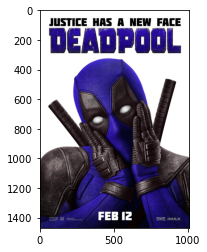

In [27]:
# building the path for the appropiate OS, data/deadpool/clean2.jpg
# testing if the path can be correctly read with the cv2 library
img = cv2.imread(os.path.join("data", "deadpool", "deadpool-poster-8.jpg"))
plt.imshow(img)
plt.show()

The weird color are caused due to the fact that opencv library reads images in a BGR colormap and matplotlib expects it to be RGB instead. We can fix this by reordering the channels.

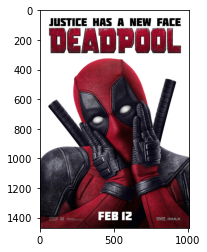

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 1.3 Getting read of any unwanted image formats

In [28]:
image_exts = ["jpeg", "jpg", "png", "bmp"]

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in (image_exts):
                print("Image not in {}".format(image_path))
                os.remove(image_path)
                
        except Exception as e:
            print("Issue with the image format {}" .format(image_path)) 

## load data

In [10]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [32]:
# super useful, shuffles and preprocesses data and reshapes images to ensure they have the same size
data = tf.keras.utils.image_dataset_from_directory("data")

Found 251 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [16]:
batch[1]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

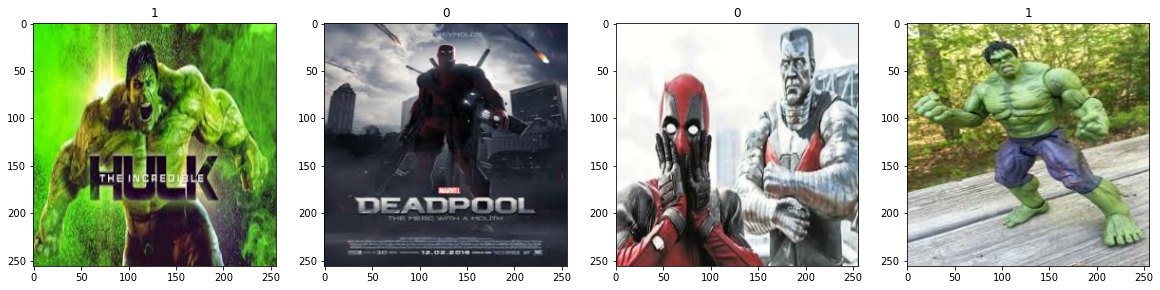

In [17]:
# Class 0 = Deadpool
# Class 1 = Hulk

fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
scaled = batch[0] / 255

## 2. Image Preprocessing

In [33]:
data = data.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [34]:
scaled_iterator = data.as_numpy_iterator()

In [35]:
scaled_iterator.next()[0].max()

1.0

In [36]:
len(data)

8

In [37]:
train_size = int(len(data)*0.7) # training
val_size = int(len(data)*0.2)+1 # validation
test_size = int(len(data)*0.1)+1 # test

In [38]:
train_size+val_size+test_size

8

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size) # we skip the batches used for the training data
test = data.skip(train_size + val_size).take(test_size)

In [40]:
len(train)

5

## Modelling

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:

model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## training

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 4s 652ms/step - loss: 0.7284 - accuracy: 0.7875 - val_loss: 0.5024 - val_accuracy: 0.6719
Epoch 2/20
5/5 [==============================] - 4s 592ms/step - loss: 0.4504 - accuracy: 0.7625 - val_loss: 0.4762 - val_accuracy: 0.8281
Epoch 3/20
5/5 [==============================] - 3s 605ms/step - loss: 0.3700 - accuracy: 0.8938 - val_loss: 0.3495 - val_accuracy: 0.9375
Epoch 4/20
5/5 [==============================] - 3s 579ms/step - loss: 0.2965 - accuracy: 0.9250 - val_loss: 0.1092 - val_accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 4s 655ms/step - loss: 0.2263 - accuracy: 0.9375 - val_loss: 0.1044 - val_accuracy: 0.9844
Epoch 6/20
5/5 [==============================] - 4s 687ms/step - loss: 0.1656 - accuracy: 0.9625 - val_loss: 0.0971 - val_accuracy: 0.9844
Epoch 7/20
5/5 [==============================] - 3s 582ms/step - loss: 0.0838 - accuracy: 0.9750 - val_loss: 0.0657 - val_accuracy: 0.9844
Epoch 8/20
5/5 [====

## plotting performance

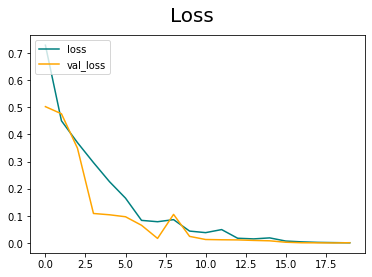

In [83]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

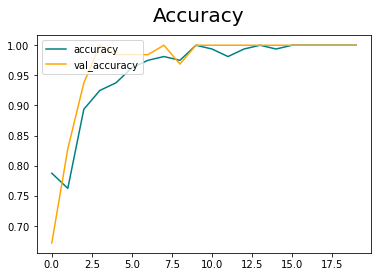

In [84]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Testing

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 139ms/step


In [54]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [55]:
import cv2

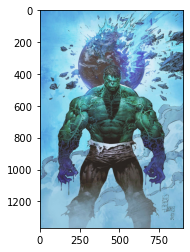

In [103]:
img1 = cv2.imread('hulk_test2.jpg')
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img3 = img2.astype(float)/255.0
plt.imshow(img1)
plt.show()

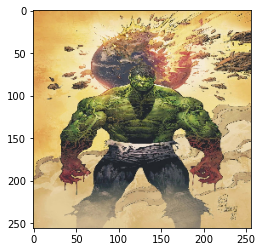

In [104]:
resize = tf.image.resize(img3, (256, 256))

plt.imshow(resize.numpy())
plt.show()


In [105]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [106]:
yhat

array([[0.5053071]], dtype=float32)

In [107]:
if yhat < 0.5: 
    print(f'Predicted class is: Deadpool')
else:
    print(f'Predicted class is: Hulk')

Predicted class is: Hulk
